<a href="https://colab.research.google.com/github/duaneywadey/A-collection-of-Jupyter-notebooks-and-CSV-files/blob/time-series/TIME_SERIES_GUIDE_ClimateData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [204]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [205]:
plt.style.use('seaborn')

df = pd.read_csv('https://raw.githubusercontent.com/duaneywadey/A-collection-of-Jupyter-notebooks-and-CSV-files/main/CSV%20Files/GlobalLandTemperatures_GlobalLandTemperaturesByMajorCity.csv', header=0, parse_dates=[0])
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [206]:
df.isnull().sum()

dt                                   0
AverageTemperature               11002
AverageTemperatureUncertainty    11002
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64

In [207]:
df = df[['dt', 'AverageTemperature', 'Country']]

options = ['Philippines', 'Thailand']
  
# selecting rows based on condition
new_df = df[df['Country'].isin(options)]
new_df['AverageTemperature'].fillna(new_df['AverageTemperature'].median(), inplace =True)



/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [208]:
new_df['Year'] = new_df['dt'].dt.year
new_df.head()

<ipython-input-208-50d6accffff9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Year'] = new_df['dt'].dt.year


,dt,AverageTemperature,Country,Year
19948,1816-03-01,27.426,Thailand,1816
19949,1816-04-01,28.349,Thailand,1816
19950,1816-05-01,28.781,Thailand,1816
19951,1816-06-01,27.197,Thailand,1816
19952,1816-07-01,25.728,Thailand,1816


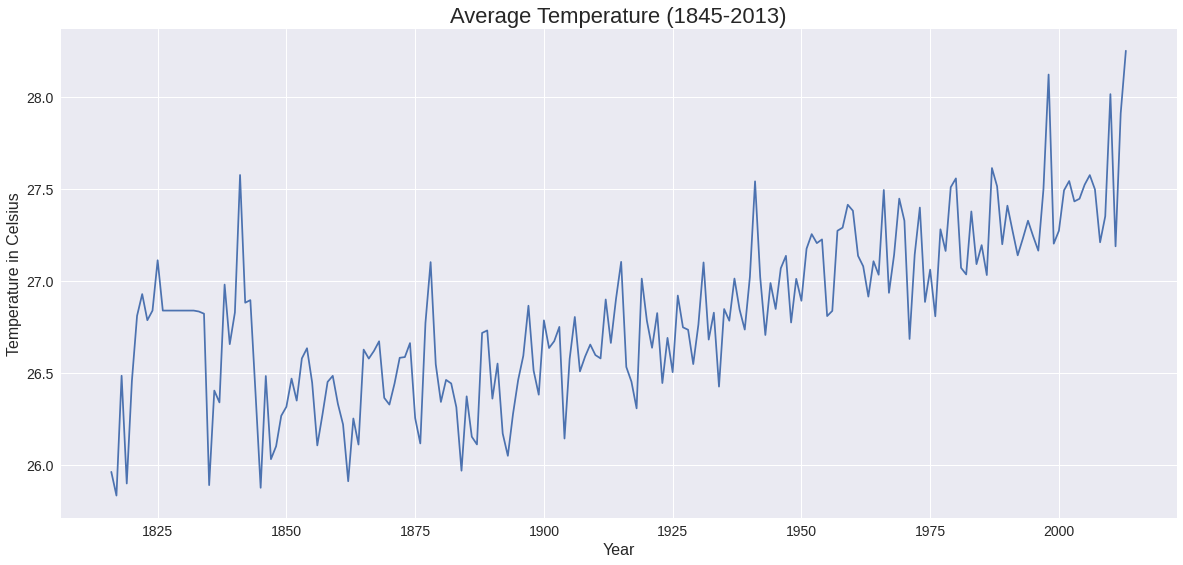

In [209]:
plt.figure(figsize=(20,9))
new_df.groupby('Year')['AverageTemperature'].mean().plot()
plt.title('Average Temperature (1845-2013)', fontsize=22)
plt.ylabel('Temperature in Celsius', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)


plt.savefig('temp.png')


In [210]:
ndf = new_df.pivot_table(index='Year', columns='Country', values='AverageTemperature', aggfunc='mean')
ndf

Country,Philippines,Thailand
Year,,
1816,NaN,25.960900
1817,NaN,25.832250
1818,NaN,26.483500
1819,NaN,25.897917
1820,NaN,26.456000
...,...,...
2009,26.915917,27.785667
2010,27.492333,28.536917
2011,26.816500,27.558333


In [211]:

for o in options:
  ndf[o].fillna(ndf[o].median(), inplace =True)

ndf.head()

Country,Philippines,Thailand
Year,,
1816,26.412917,25.960900
1817,26.412917,25.832250
1818,26.412917,26.483500
1819,26.412917,25.897917
1820,26.412917,26.456000


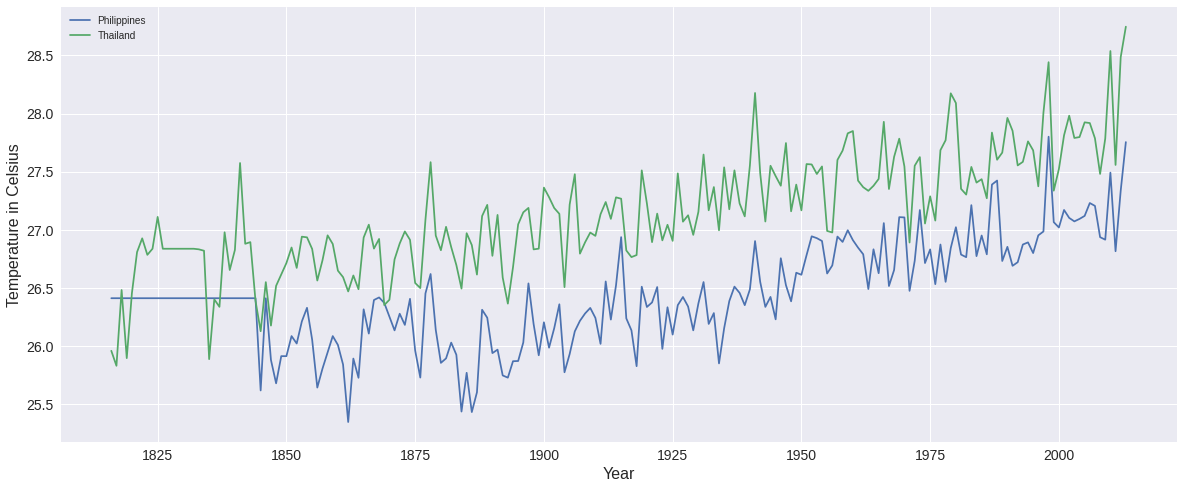

In [212]:

ndf = ndf.reset_index(level=0)
plt.figure(figsize=(20,8))
for o in options:
  sns.lineplot(x=ndf['Year'], y=ndf[o], label=o)
  plt.ylabel('Temperature in Celsius', fontsize=16)
  plt.xlabel('Year', fontsize=16)
  plt.yticks(fontsize=14)
  plt.xticks(fontsize=14)